In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Display all the columns of dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# loading the dataset
df = pd.read_csv("/content/Heart Disease data.csv")

In [3]:
# Shape of the dataset with rows and columns
df.shape

(1025, 14)

In [4]:
# Displaying the first 5 rows of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### OBSERVATION
- There is no missing value in any of the column.

In [7]:
# Statistical Information
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Creating a function to convert numerical feature to categorical feature
def heart_diseases(value):
    if value == 0:
        return 'presence'
    else:
        return 'absence'

In [9]:
# Adding a new column to the dataset of converted data
df['heart_disease'] = df['target'].apply(heart_diseases)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,presence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,presence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,presence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,presence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,presence


In [11]:
# Counting the number of people having heart diseases and not having heart disease
hd = df.groupby('heart_disease')['target'].count()
hd

heart_disease
absence     526
presence    499
Name: target, dtype: int64

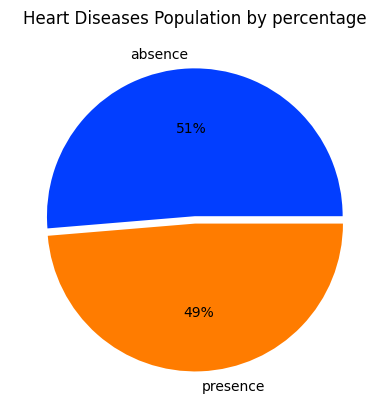

In [12]:
# Ploting the bar chart of people having and not having heart disease
clrs = sb.color_palette('bright')
explode = [0, 0.05]
plt.pie(hd, labels = ['absence', 'presence'], autopct = '%0.0f%%', colors = clrs, explode = explode)
plt.title('Heart Diseases Population by percentage')
plt.show()

### OBSERVATION
- From the above Pie Chart, people not having heart disease (51%) are more than the people who have heart disease (49%)

In [13]:
# Finding the minimum, maximum and average of the population age using statistical analysis
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

The minimum age is 29
The maximum age is 77
The average age is 54.43


In [14]:
# Dividing the population age in different categories
young_age = df[(df['age'] >= 29) & (df['age'] < 40)]
middle_age = df[(df['age'] >= 40) & (df['age'] < 55)]
old_age = df[(df['age'] > 55)]
print(f"Number of young age people = {len(young_age)}")
print(f'Number of middle age people = {len(middle_age)}')
print(f'Number of old age people = {len(old_age)}')

Number of young age people = 57
Number of middle age people = 419
Number of old age people = 519


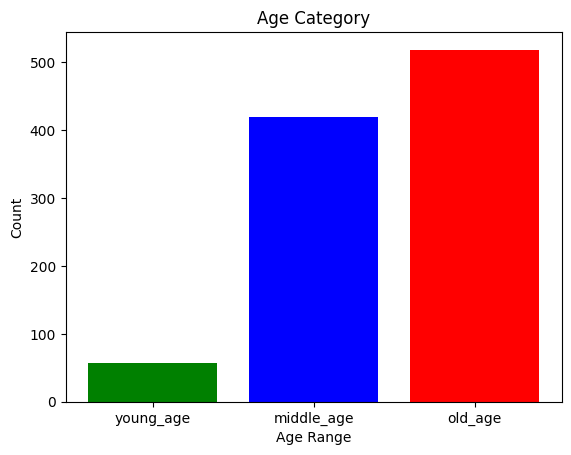

In [15]:
# PLotting a Bar plot for different categories of population age
category = ['young_age','middle_age','old_age']
_count = [len(young_age), len(middle_age), len(old_age)]
plt.bar(category, _count, color = ['green', 'blue','red'])
plt.title('Age Category')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

### OBSERVATION
- From the above plot, we observed that old age population is more than the middle age and young age population. And there is least population of young age.

In [16]:
# Converting population age into range of age
def age_range(row):
    if row >= 29 and row < 40:
        return 'youngAge'
    elif row >= 40 and row < 55:
        return 'middleAge'
    else:
        return 'oldAge'

In [17]:
df['ageRange'] = df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,presence,middleAge
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,presence,middleAge
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,presence,oldAge
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,presence,oldAge
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,presence,oldAge


In [18]:
# Converting numerical data into categorical data for sex
def _sex(row):
    if row == 1:
        return 'male'
    else:
        return 'female'

In [19]:
df['gender'] = df['sex'].apply(_sex)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,presence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,presence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,presence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,presence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,presence,oldAge,female


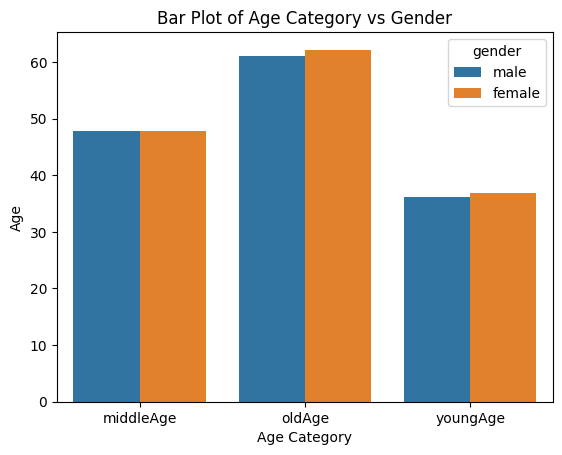

In [20]:
# Plotting a bar plot for Age category vs gender
sb.barplot(x = 'ageRange', y = 'age', hue = 'gender', ci = None, data = df)
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.title('Bar Plot of Age Category vs Gender')
plt.show()

### OBSERVATION
- In the middle age, the number of male population is almost equal to the female population. In young age and old age female population is slightly more.

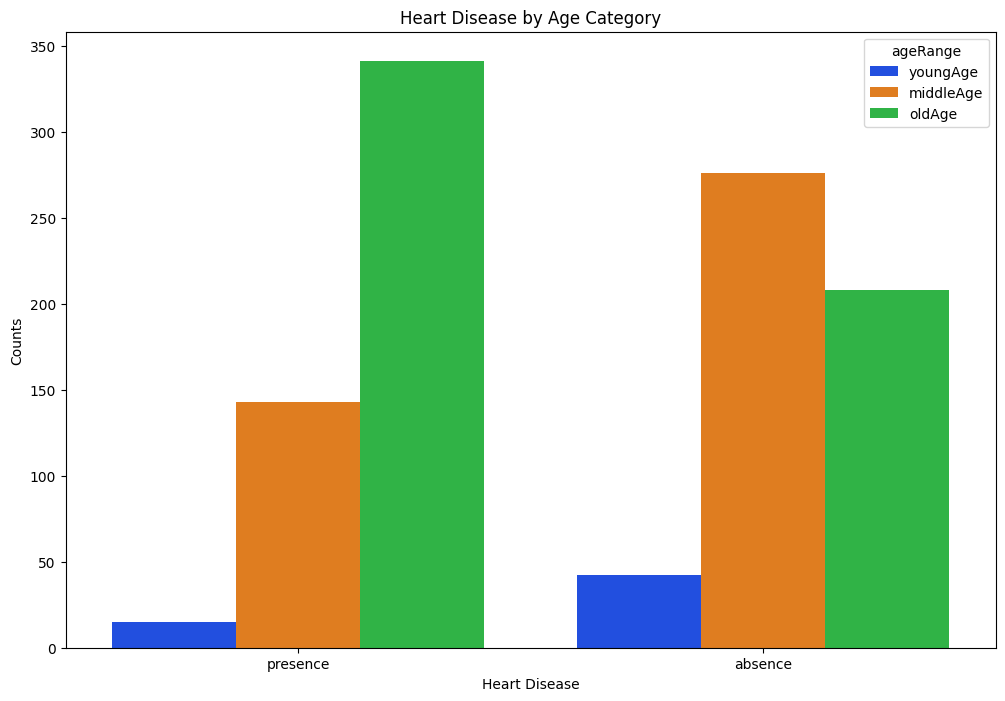

In [21]:
# Plotting Count plot for heart diseases according to thier age category
plt.figure(figsize = (12,8))
hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Heart Disease by Age Category")
sb.countplot(x = 'heart_disease', hue = 'ageRange', data = df, hue_order = hue_orders, palette = 'bright')
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

### OBSERVATION
- Old age people are most affected by the Heart disease and young age people are least affected.

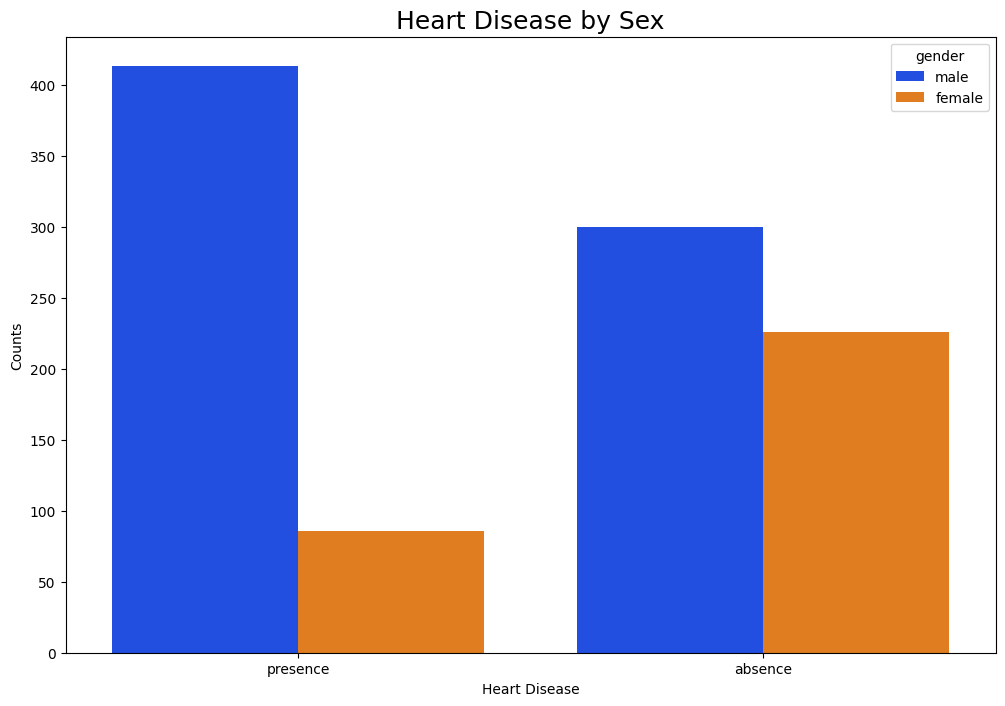

In [22]:
# Plotting Count plot for heart diseases based on sex
plt.figure(figsize = (12,8))
plt.title("Heart Disease by Sex", fontsize = 18)
sb.countplot(x = df['heart_disease'], hue = 'gender', data = df, palette = "bright")
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

### OBSERVATION
- From the above graph, it is observed that there are more number of males affected by heart diseases in comparison to females.

In [23]:
# Converting numerical data into categorical data by type of chest pain
def typePain(val):
  if val == 0: return 'typical angina'
  elif val == 1: return 'atypical angina'
  elif val == 2: return 'non-anginal'
  else: return 'asymptomatic'

In [24]:
# Creating a column for type of chest pain
df['chestPain'] = df['cp'].apply(typePain)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender,chestPain
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,presence,middleAge,male,typical angina
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,presence,middleAge,male,typical angina
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,presence,oldAge,male,typical angina
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,presence,oldAge,male,typical angina
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,presence,oldAge,female,typical angina


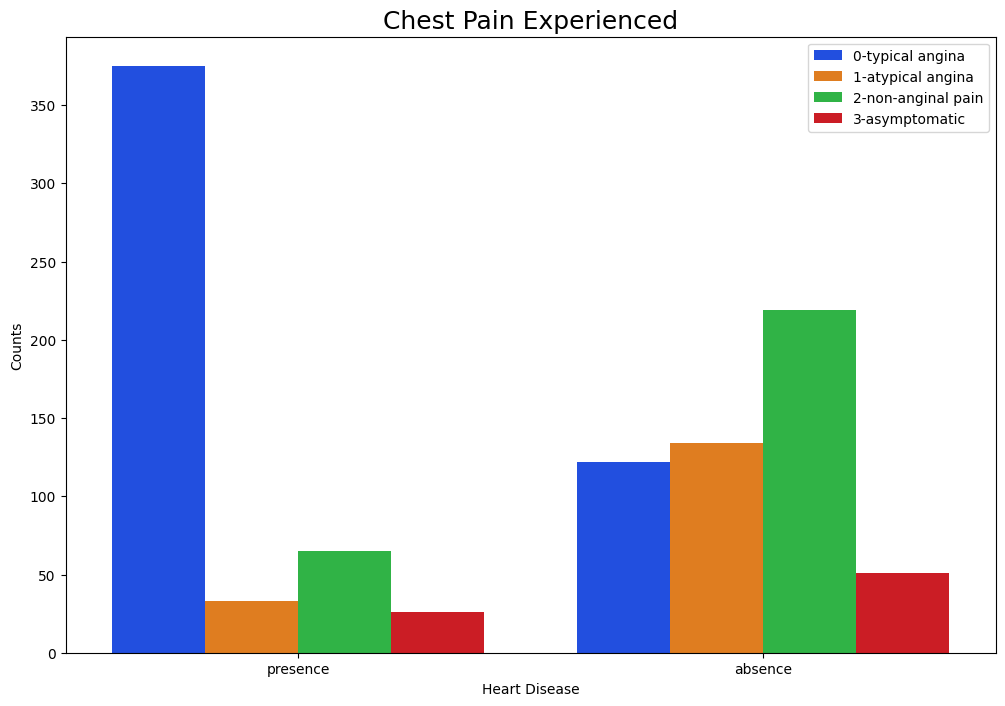

In [25]:
# Count plot based on chest pain experienced
plt.figure(figsize = (12,8))
plt.title("Chest Pain Experienced", fontsize = 18)
sb.countplot(x = df['heart_disease'], hue = 'cp', data = df, palette = "bright")
plt.legend(labels = ['0-typical angina','1-atypical angina','2-non-anginal pain','3-asymptomatic'])
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

### OBSERVATION
- It is observed that people having typical anginal chest pain have higher chance of heart diseases.

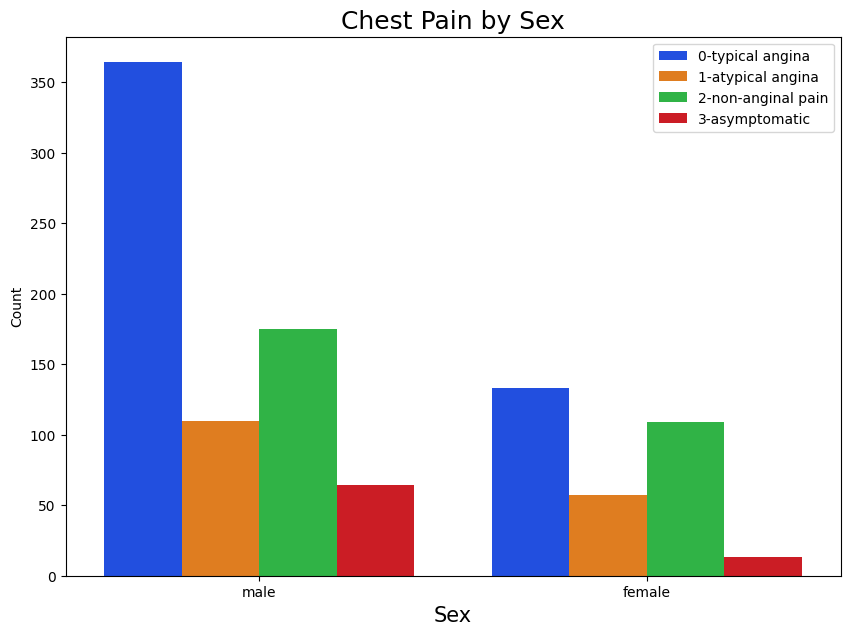

In [26]:
# Plotting Count plot for chest pain based on gender
plt.figure(figsize = (10,7))
plt.title("Chest Pain by Sex", fontsize = 18)
sb.countplot(x = df['gender'], hue = 'cp', data = df, palette = 'bright')
plt.legend(labels = ['0-typical angina','1-atypical angina','2-non-anginal pain','3-asymptomatic'])
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count')
plt.show()

### OBSERVATION
- It is observed that higher number of males are suffering from chest pain.

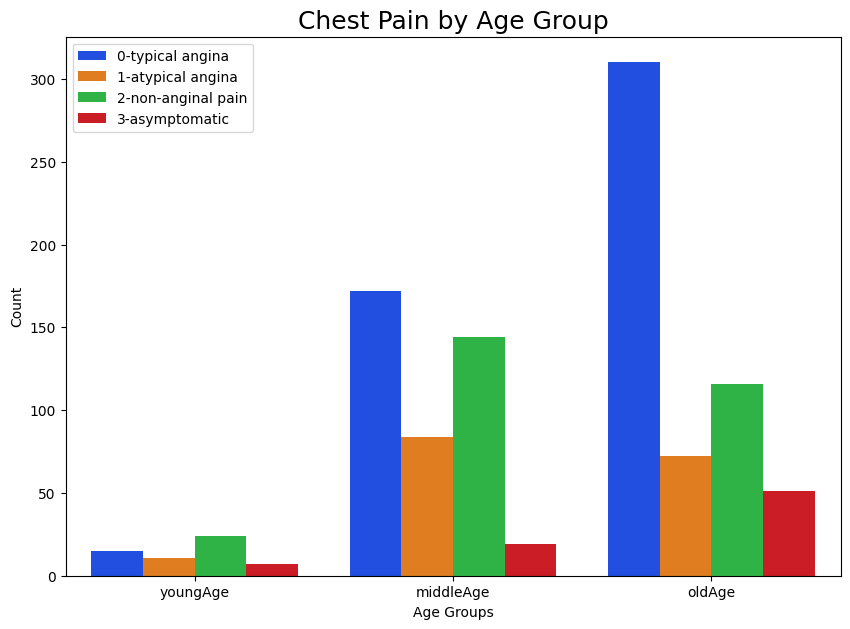

In [27]:
# Plotting Count plot for chest pain vs age group
plt.figure(figsize = (10,7))
plt.title("Chest Pain by Age Group", fontsize = 18)
sb.countplot(x = df['ageRange'], hue = 'cp', data = df, palette = 'bright', order = ['youngAge', 'middleAge', 'oldAge'])
plt.legend(labels = ['0-typical angina','1-atypical angina','2-non-anginal pain','3-asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

### OBSERVATION
- It seems that old age and middle age group have very high typical angina chest pain and non-anginal chest pain.

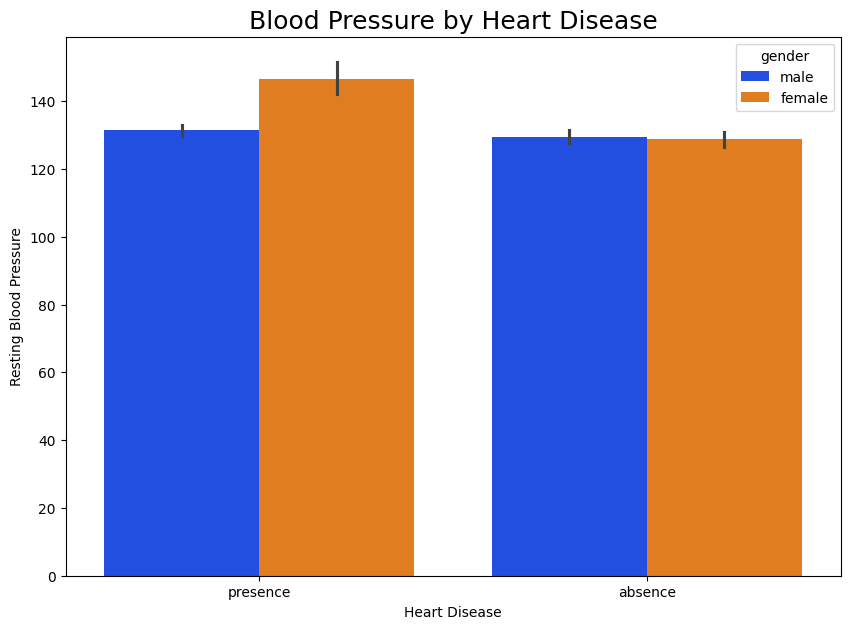

In [28]:
# Plotting Bar graph for Restin blood pressure(trestbs) based on Heart Disease
plt.figure(figsize = (10,7))
plt.title('Blood Pressure by Heart Disease', fontsize = 18)
sb.barplot(x = 'heart_disease', y = 'trestbps', hue = 'gender', data = df, palette = 'bright')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

### OBSERAVTION
- It is observed that slightly higher Resting Blood Pressue has the risk of heart disease specially in female.

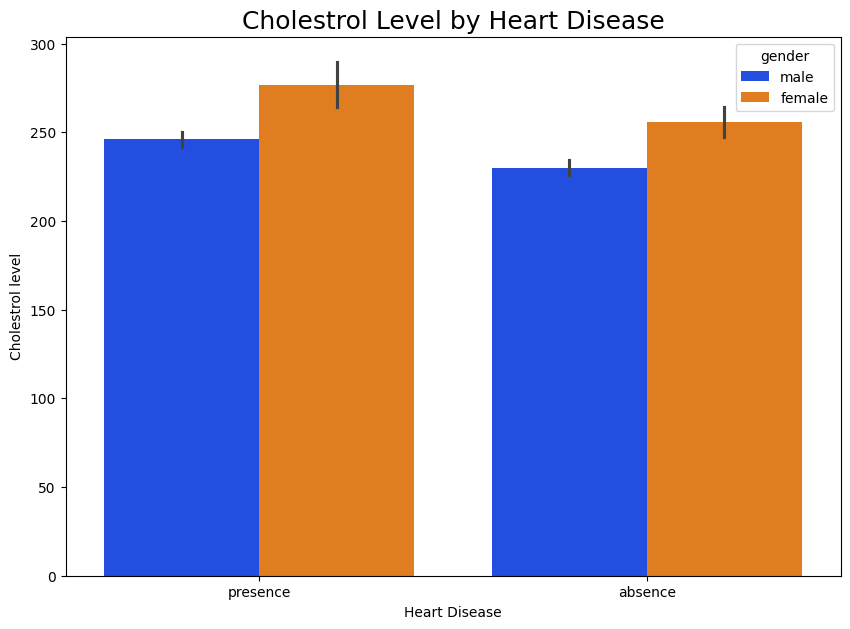

In [29]:
# Plotting Bar graph for Cholestrol level based on Heart Disease
plt.figure(figsize = (10,7))
plt.title('Cholestrol Level by Heart Disease', fontsize = 18)
sb.barplot(x = 'heart_disease', y = 'chol', hue = 'gender', data = df, palette = 'bright')
plt.xlabel('Heart Disease')
plt.ylabel('Cholestrol level')
plt.show()

### OBSERVATION
- Cholestrol level is more in females as compared to males and has a high risk of heart disease risk.

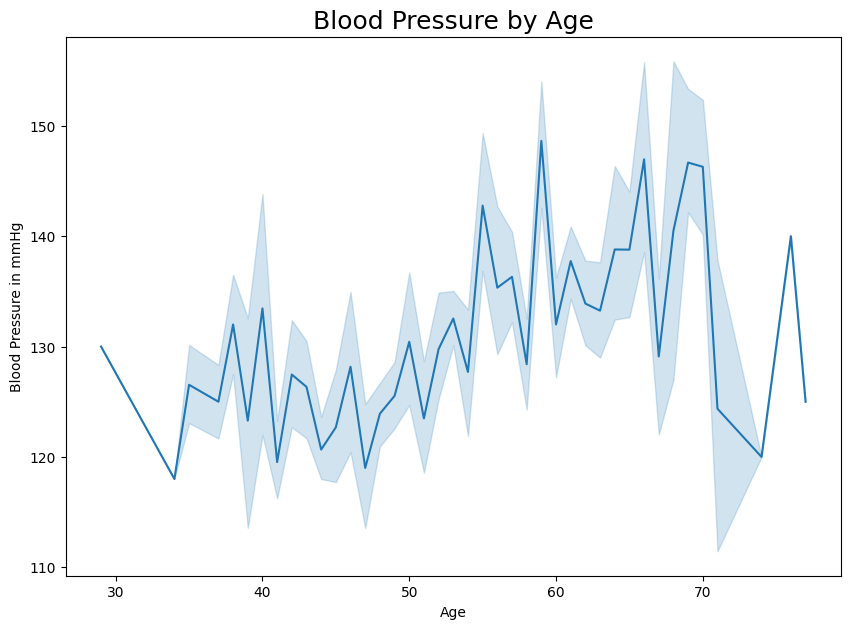

In [30]:
# Plotting Line plot for blood pressue vs age
plt.figure(figsize = (10,7))
plt.title('Blood Pressure by Age', fontsize=18)
sb.lineplot(x = 'age', y = 'trestbps', data = df, palette = 'bright')
plt.xlabel('Age')
plt.ylabel('Blood Pressure in mmHg')
plt.show()

### OBSERVATION
- The blood pressure is normal from 30 to 50 and after 50 it increases gradually to age of 60. And after age of 60 it is fluctuating drastically.

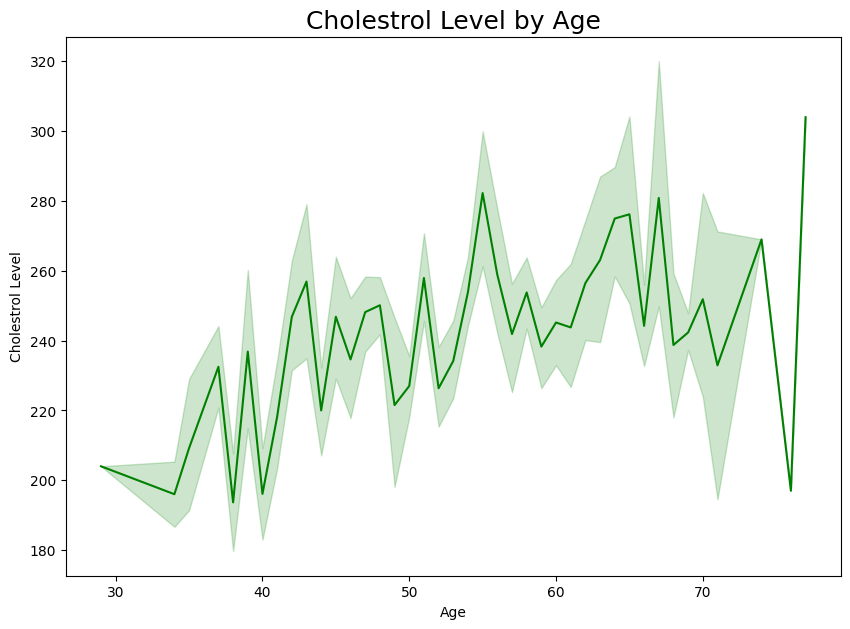

In [31]:
# Plotting Line plot for cholestrol level vs age
plt.figure(figsize = (10,7))
plt.title('Cholestrol Level by Age', fontsize = 18)
sb.lineplot(x = 'age', y = 'chol', data = df, color = 'green')
plt.xlabel('Age')
plt.ylabel('Cholestrol Level')
plt.show()

### OBSERVATION
- Cholestral level is increasing after the age of 40.

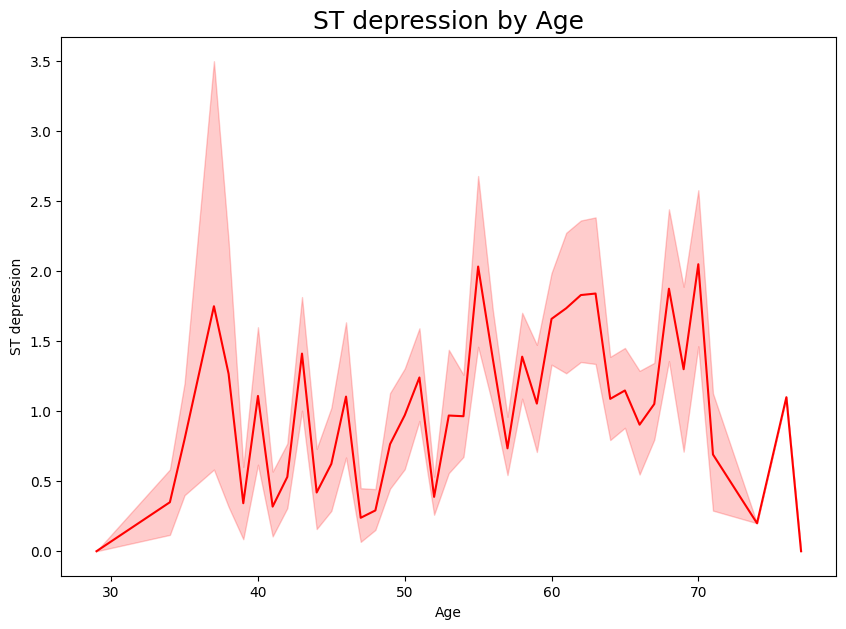

In [32]:
# Plotting Line plot for ST depression vs age
plt.figure(figsize = (10,7))
plt.title('ST depression by Age', fontsize = 18)
sb.lineplot(x = 'age', y = 'oldpeak', data = df, color = 'red')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.show()

### OBSERVATION
- Depression level is quite high in the age group of 30 to 40 and 50 to 70. Whereas in 40 to 55 the depression level is quite stable.

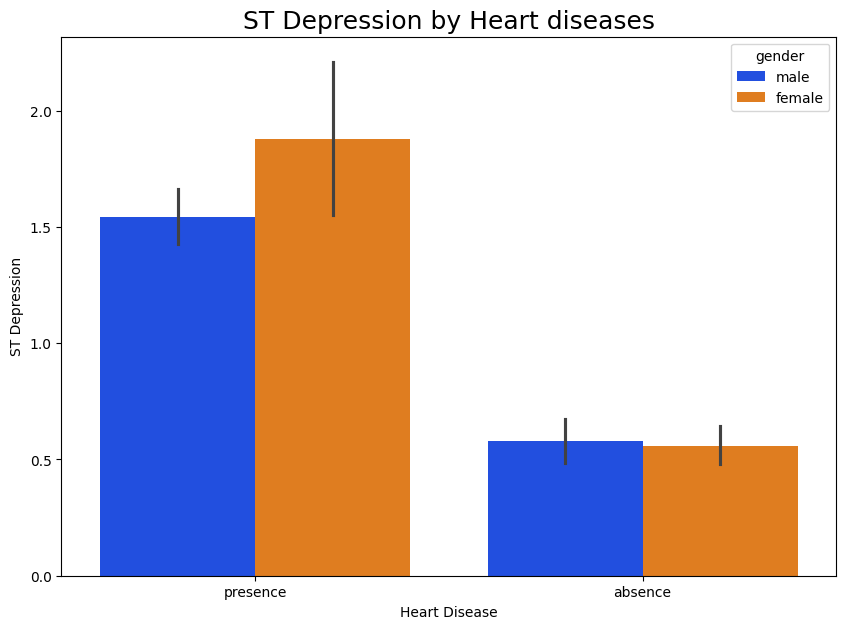

In [33]:
# PLotting Bar graph for ST Depression vs Heart diseases
plt.figure(figsize = (10,7))
plt.title('ST Depression by Heart diseases', fontsize = 18)
sb.barplot(x = 'heart_disease', y = 'oldpeak', hue = 'gender', data = df, palette = 'bright')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')
plt.show()

### OBSERVATION
- High ST depression mean that the person have high chances of Heart diseases.

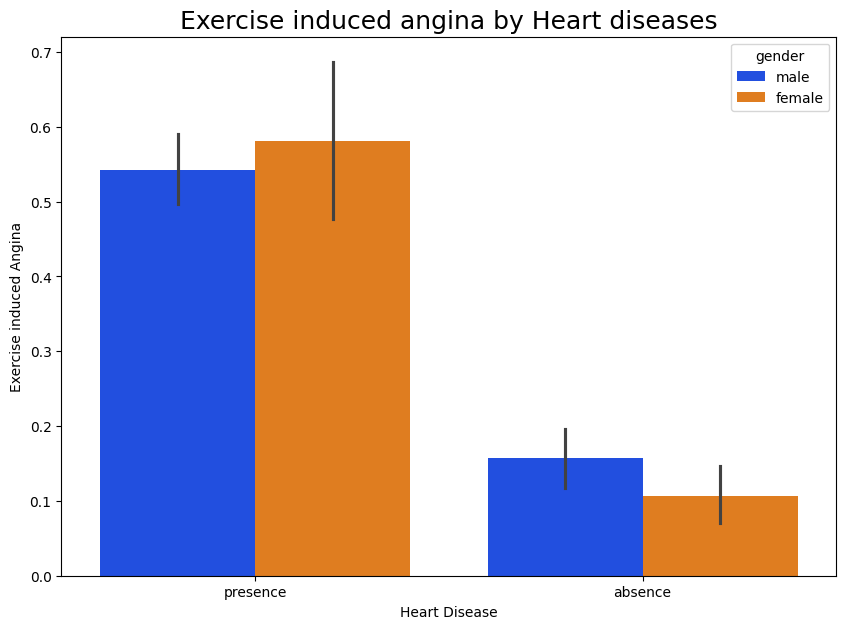

In [34]:
# Plotting Bar graph for exercise induced Angina vs Heart diseases
plt.figure(figsize = (10,7))
plt.title('Exercise induced angina by Heart diseases', fontsize = 18)
sb.barplot(x = 'heart_disease', y = 'exang', hue = 'gender', data = df, palette = 'bright')
plt.xlabel('Heart Disease')
plt.ylabel('Exercise induced Angina')
plt.show()

### OBSERVATION
- Exercise induced angina increase the risk of heart disease in both male and female.

In [35]:
# Exporting the final data for creating tableau dashboard
df.to_csv("my_data.csv", index = False)

### FINDINGS

1. **Data Overview:**
   - The dataset contains information about individuals and whether they have heart disease.
   - No missing values were found in the dataset.

2. **Population Distribution:**
   - Approximately 51% of the population does not have heart disease, while 49% have heart disease.

3. **Age Distribution:**
   - The minimum age observed is 29, the maximum is 77, and the average age is approximately 54.
   - The population is divided into three age categories: young age (29-39), middle age (40-54), and old age (55 and above).
   - The old age population is more than the middle age and young age population.

4. **Gender Distribution:**
   - There are slightly more males affected by heart disease compared to females.

5. **Chest Pain Analysis:**
   - Individuals experiencing typical anginal chest pain have a higher chance of heart disease.
   - More males are suffering from chest pain compared to females.
   - Old age and middle age groups have a higher incidence of typical anginal chest pain and non-anginal chest pain.

6. **Blood Pressure and Cholesterol Levels:**
   - Higher resting blood pressure and cholesterol levels are associated with a higher risk of heart disease.
   - Females tend to have higher cholesterol levels compared to males.

7. **Age-related Trends:**
   - Blood pressure remains normal from ages 30 to 50, then gradually increases until around age 60.
   - Cholesterol levels start increasing after the age of 40.

8. **ST Depression and Exercise-Induced Angina:**
   - Higher ST depression levels indicate a higher risk of heart disease.
   - Exercise-induced angina increases the risk of heart disease in both males and females.